In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt

from numpy import arange
from scipy.integrate import odeint
from scipy import optimize
from scipy import misc

In [2]:
# parameters
m = 100                                #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

## Here just playing with the particle number density, nothing importat

In [3]:
x=np.linspace(2,4,100)
s=np.sin(x)

In [4]:
T= np.linspace(400000,3200,200000)
m=30

In [5]:
def n_no_g(m,T):
    return ((m*T/(2*np.pi))**(3/2))* np.exp(-(m/T))

#this is the number density of particles in a non relativistic limit without the g factor of the d.o.f.

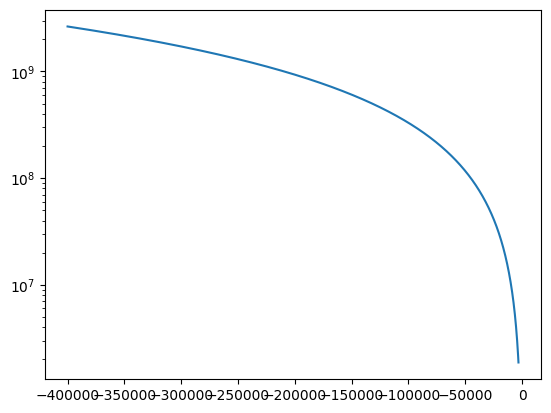

In [6]:
plt.plot(-T,n_no_g(m,T))
plt.yscale('log')

In [7]:
# okay it follow the right behaviour of the equilibrium of particles.

#But also the massive particles had their period in which they obey at the radiation behaviour, no?
#And then starts to be a non radiative one (as the one just plotted), do we have to consider it?


## Trying to parametrize the relativistic degree of freedom

In [8]:
import pandas as pd

In [9]:
dfgstar_squar=pd.DataFrame([
    {'T':0.05 *1E-3,'gstar_squar': np.sqrt(3.38)},     #taken from the presentation graphic
    {'T':1E-3,'gstar_squar':np.sqrt(10.75)},     #taken from the presentation graphic
    {'T':80*1E-3,'gstar_squar':np.sqrt(17.25)},     #taken from the presentation graphic
    {'T':250*1E-3,'gstar_squar':np.sqrt(61.75)},     #taken from the presentation graphic
    {'T':800*1E-3,'gstar_squar':np.sqrt(75.75)},     #taken from the presentation graphic
    {'T':1,'gstar_squar':8.7},       # I leave it
    {'T':10,'gstar_squar':np.sqrt(86.25)},     #taken from the presentation graphic
    {'T':50,'gstar_squar':np.sqrt(96.25)},     #taken from the presentation graphic
    {'T':100,'gstar_squar':10.2}      #I leave it too
    ])



In [10]:
dfgstar_squar

,T,gstar_squar
0,0.00005,1.838478
1,0.00100,3.278719
2,0.08000,4.153312
3,0.25000,7.858117
4,0.80000,8.703448
5,1.00000,8.700000
6,10.00000,9.287088
7,50.00000,9.810708
8,100.00000,10.200000


In [11]:
dfgstar_squar['T']

0      0.00005
1      0.00100
2      0.08000
3      0.25000
4      0.80000
5      1.00000
6     10.00000
7     50.00000
8    100.00000
Name: T, dtype: float64

In [12]:
from scipy import optimize

In [13]:
#f=lambda T,a,b,c: a/(1+np.exp(-b*(T-c)))  ********(swith it off for a moment)

def f(T,a,b,c,d,e,f): 
    return a/(1+np.exp(-b*(T-c)))+d+e+(f*T**2)

#function that shoud parametrize the g star functions in principle
#Chosen an activation function for similarity
#******

In [14]:
param,somthing =optimize.curve_fit(f,dfgstar_squar['T'],dfgstar_squar['gstar_squar'],p0=(0,0,0,0,0,0))  #***(added a 0)


# Use non-linear least squares to fit a function, f, to data.

# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True,
# bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)

#p gives initial guess for the parameters

#gives the right values for the parameters of the function

In [15]:
param  # param HAS INSIDE THE VALUES OF THE PARAMETERS
    #YOU GET THEM BY FITTING SOME DATA TAKEN FROM A PLOT OF g star

array([ 7.89548643e+00,  1.30777606e+01,  1.15376901e-01,  5.42990436e+02,
       -5.41874920e+02,  1.30965399e-04])

In [16]:
g_good= lambda T: f(T,a=param[0],b=param[1],c=param[2],d=param[3],e=param[4],f=param[5])  

#this is a function just to call the right "function" with inside the right parameters in principle.                         

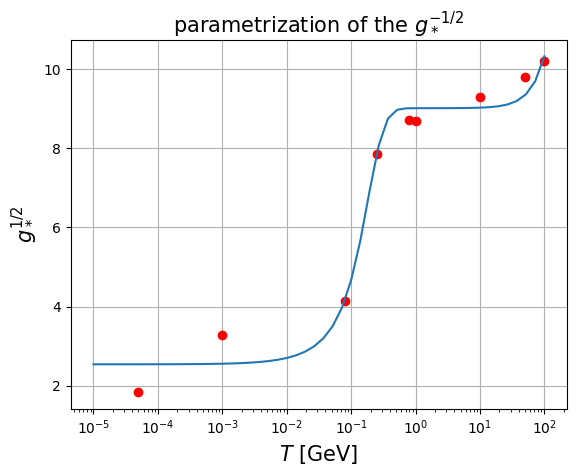

In [17]:
T=np.logspace(np.log10(1E-5),np.log10(100))
plt.semilogx(dfgstar_squar['T'],dfgstar_squar['gstar_squar'],'ro') #semilogx Make a plot with log scaling on the x axis.
plt.plot(T,g_good(T) )   
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

plt.title('parametrization of the $g_*^{-1/2}$', size= 15)
#plt.legend()
plt.grid()

#looking to the behaviour of g_*



#the parametrization of g_* must be done in a better way
#that plot was to verify that the function we've biult respect the data we have.
#not good


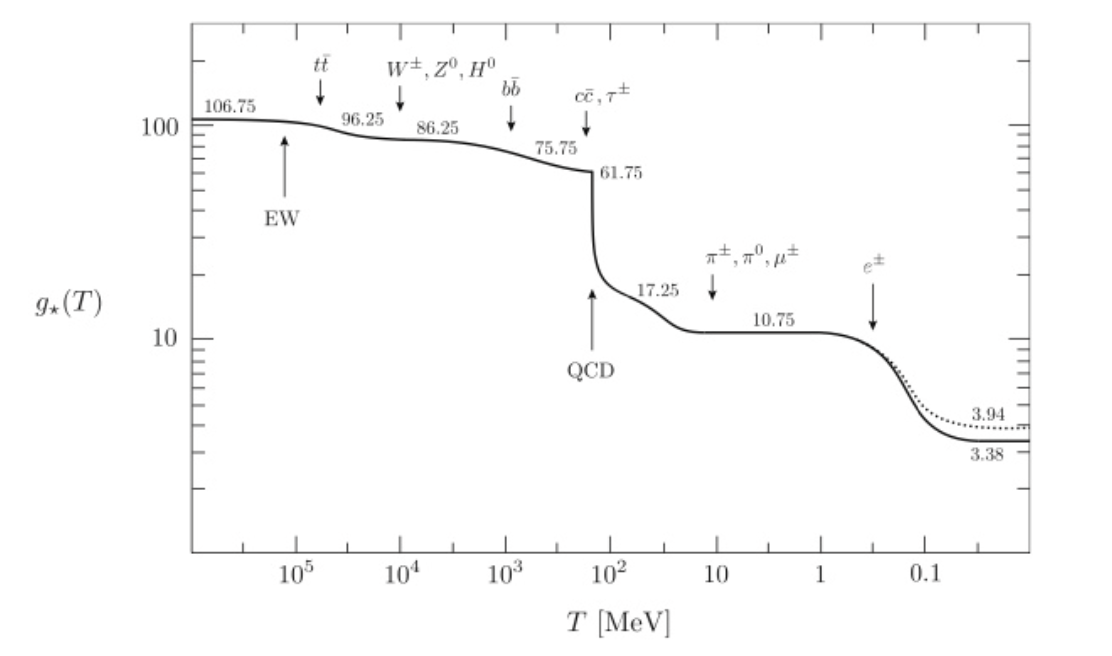


$$\frac{dY}{dx}=- \Bigl(\frac{45}{\pi M_P^2}\Bigr)^{-1/2} \frac{g_*^{1/2}m}{x^2} <\sigma v>(Y^2-Y_{eq}^2)$$


$$ Y_{eq}(x)= \frac{45}{2 \pi^4} \frac{g}{g_{*s}}x^{3/2}e^{-x}= 0.145 \frac{g}{g_{*s}}x^{3/2}e^{-x} $$

### $\frac{g}{g_{*s}}$ what I have to do with this fraction? And isn't missing also a factor $\Bigl(\frac{\pi}{8}\Bigr)^{1/2}?$  Maybe not

$$ g_*(T)= \sum_{boson} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 + \frac{7}{8}\sum_{fermions} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 $$

$$ g_{*s}(T)= \sum_{boson} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 + \frac{7}{8}\sum_{fermions} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 $$

## Computation with the use of the function g_good

In [18]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

#DESCRIPTION
# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
# So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
# the starting point, and the third is the variable you want to integrate into.
#************

In [19]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)  #In principle there should be also here a degree of freedom factor

In [20]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  #starting to build the dY/dx

def BEx(x,m=100):
    T=m/x
    return k*g_good(T)/x**2   #missing piece of the formula.

In [21]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx

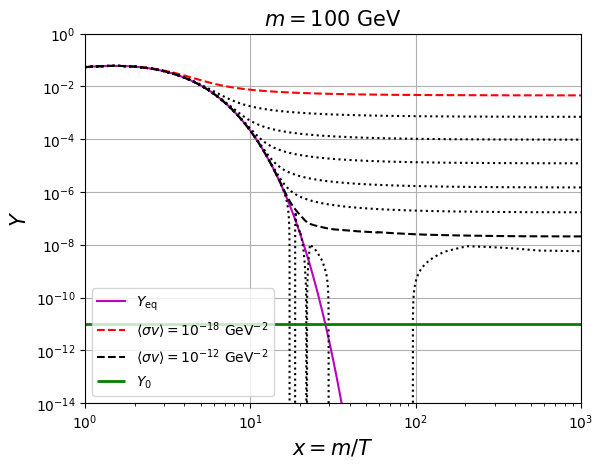

In [22]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')




k=fk(sigmav=1E-18)  
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')

k=fk(sigmav=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


#*****************
k=fk(sigmav=1E-10)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN 1E-11?!?!?                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')  #THAT'S THE LAST BLACK LINE




plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease

In [23]:
# I was wondering if we had to consider also the radiation era when the co-omiving number density
# is constant to get a much complete description, but probably it's irrelevant.

# We are interested to the freeze-out part, and the previous
# one is kind of "trivial" because is constant.

## Computation without the use of the function g_good

In [24]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
#So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
#the starting point, and the third is the variable you want to integrate into.
#************

In [25]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x) 

In [26]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  

def BEx(x,m=100):
    #T=m/x
    return k/x**2   

In [27]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   

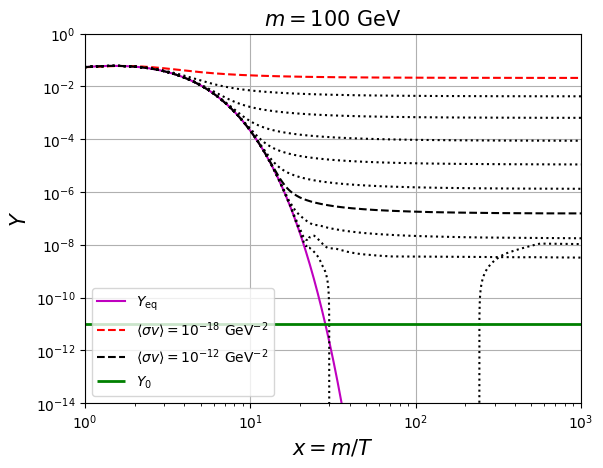

In [28]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')



k=fk(sigmav=1E-18)  
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')

k=fk(sigmav=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


#*****************
k=fk(sigmav=1E-11)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN E-11????????                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-10)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN E-11????????                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-9)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN E-11????????                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')  #THAT'S THE LAST BLACK LINE




plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE 


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease